# Evaluate Single Algorithm on One Dataset (Single Run)

This notebook runs one decision tree algorithm on one shape using one seed, evaluates it across depths, and visualizes the results.


In [1]:
from C_oblique_decision_trees.visualization.single_run_plots import (plot_coverage_density_for_shape, 
                                                                     plot_decision_regions_from_dict, 
                                                                     plot_oblique_splits_from_dict,
                                                                     plot_oblique_splits_clipped)
from C_oblique_decision_trees.evaluation.benchmark_runner import DepthSweepRunner
from C_oblique_decision_trees.evaluation.io_utils import load_trees_dict, load_depth_sweep_df

from _adopted_oblique_trees.segmentor import CARTSegmentor
from _adopted_oblique_trees.split_criteria import gini

from src.load_shapes import load_shape_dataset

In [2]:
# Load & scale dataset
# datasets = load_shape_dataset()
datasets = load_shape_dataset(folder_name="shapes_noise_dimensionality_tests")


Loaded 7 paired datasets: ['radial_segment_3d_fuzziness_003_10000_samples_dim_03', 'radial_segment_3d_fuzziness_003_10000_samples_dim_05', 'radial_segment_3d_fuzziness_003_10000_samples_dim_10', 'radial_segment_3d_fuzziness_003_10000_samples_dim_15', 'radial_segment_3d_fuzziness_003_10000_samples_dim_20', 'radial_segment_3d_fuzziness_003_10000_samples_dim_25', 'radial_segment_3d_fuzziness_003_10000_samples_dim_30']


In [3]:
dataset = "radial_segment_3d_fuzziness_003_10000_samples_dim_10"

datasets_dict = {
    dataset: datasets[dataset]
}
X, y = datasets[dataset]

In [4]:
print(X)
print(y)

             0         1         2   noise_1   noise_2   noise_3   noise_4  \
0     0.169008  0.476980  0.750835  0.511822  0.572126  0.360137  0.703517   
1     0.122977  0.544260  0.284106  0.950464  0.031302  0.467087  0.868309   
2     0.989423  0.284143  0.838364  0.144160  0.145296  0.443668  0.334144   
3     0.206450  0.792667  0.156332  0.948649  0.824370  0.314289  0.020780   
4     0.636659  0.314502  0.836505  0.311831  0.338077  0.091820  0.519248   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.336214  0.324181  0.623847  0.450690  0.997200  0.327596  0.931265   
9996  0.127001  0.173766  0.947703  0.631516  0.638636  0.212674  0.485016   
9997  0.124946  0.499847  0.237640  0.116519  0.417162  0.864842  0.897516   
9998  0.291498  0.371687  0.514210  0.319809  0.945928  0.413535  0.397069   
9999  0.265034  0.255124  0.115880  0.481454  0.281505  0.499189  0.069867   

       noise_5   noise_6   noise_7  
0     0.145286  0.510328  

In [5]:
# Configuration
max_depth = 4
seed = 1
impurity = gini
segmentor = CARTSegmentor()
algorithm = "hhcart_d"  # Options: "hhcart_a", "hhcart_d", "randcart", "oc1", "wodt", "co2", "ridge_cart", "cart"
dataset = "radial_segment_3d_fuzziness_003_10000_samples_dim_10"

In [6]:
datasets_dict = {
    dataset: datasets[dataset]
}
X, y = datasets[dataset]

In [7]:
# Build registry with user-defined components
full_registry = DepthSweepRunner.build_registry(
    random_state=seed,
    impurity=impurity,
    segmentor=segmentor,
    n_rotations=3,
)

In [8]:
# Define a custom registry for specific models
registry = {algorithm: full_registry[algorithm]}

In [ ]:
# Create and run
runner = DepthSweepRunner(datasets=datasets_dict, max_depth=max_depth)
df_no_noise, trees_dict_no_noise = runner.run(
    fixed_seed=seed,
    registry=registry,
    auto_export=True,
    filename=f"{algorithm}_{dataset}.csv",
    tree_dict_filename=f"{algorithm}_{dataset}.pkl"
)

Depth Sweeping:  60%|██████    | 3/5 [16:56<10:56, 328.02s/it]

In [8]:
dataframe_no_noise = load_depth_sweep_df(filename=f"{algorithm}_{dataset}.csv")
dict_no_noise = load_trees_dict(filename=f"{algorithm}_{dataset}.pkl")

[OK] Loaded DataFrame from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\hhcart_d_radial_segment_3d_fuzziness_003_10000_samples_dim_10.csv
[OK] Loaded trees_dict from: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\hhcart_d_radial_segment_3d_fuzziness_003_10000_samples_dim_10.pkl


C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\C_oblique_decision_trees\visualization\single_run_plots.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  x_split = -b / w[0]
C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\C_oblique_decision_trees\visualization\single_run_plots.py:104: RuntimeWarning: divide by zero encountered in scalar divide
  x_split = -b / w[0]
C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\C_oblique_decision_trees\visualization\single_run_plots.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  x_split = -b / w[0]
C:\Users\jaspe\OneDrive\Desktop\Thesis Non Orthogonal Designs\thesis\.venv\Lib\site-packages\shapely\constructive.py:667: RuntimeWarning: invalid value encountered in polygonize
  return lib.polygonize(geometries, **kwargs)


[!] No clipped segment at depth 0
[!] No clipped segment at depth 0
[!] Invalid region at depth 1
Depth 3 missing in trees_dict.
Depth 4 missing in trees_dict.
[✓] Saved clipped split figure: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\plot_of_clipped_splits_hhcart_d_radial_segment_3d_fuzziness_003_10000_samples_dim_10.pdf


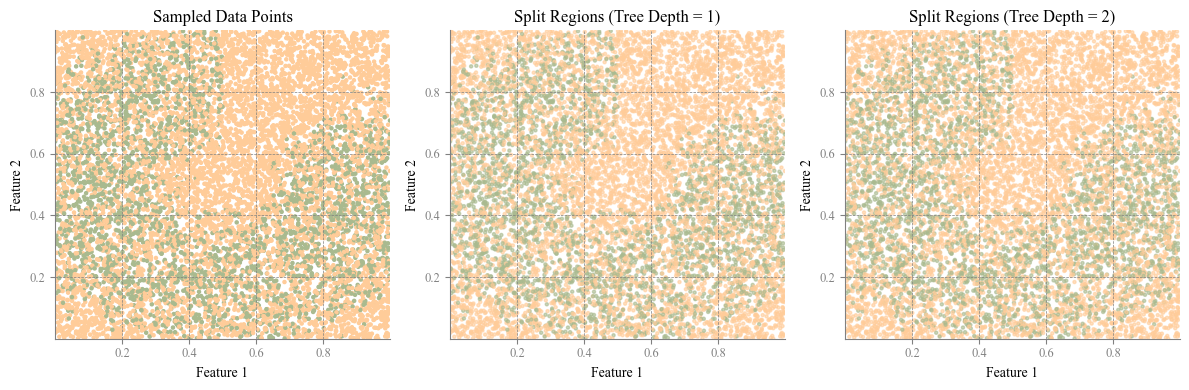

In [9]:
plot_oblique_splits_clipped(X, y, dict_no_noise, max_depth=max_depth, save_name=f"plot_of_clipped_splits_{algorithm}_{dataset}.pdf")

Depth 3 missing in trees_dict.
Depth 4 missing in trees_dict.
[✓] Saved oblique split figure: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\plot_of_splits_hhcart_d_radial_segment_3d_fuzziness_003_10000_samples_dim_10.pdf


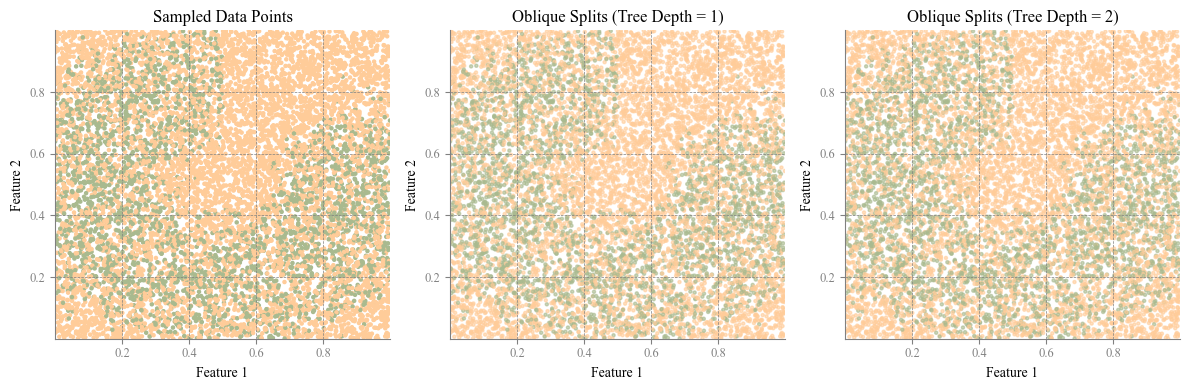

In [10]:
plot_oblique_splits_from_dict(X, y, dict_no_noise, max_depth, save_name=f"plot_of_splits_{algorithm}_{dataset}.pdf")

ValueError: shapes (2,) and (10,) not aligned: 2 (dim 0) != 10 (dim 0)

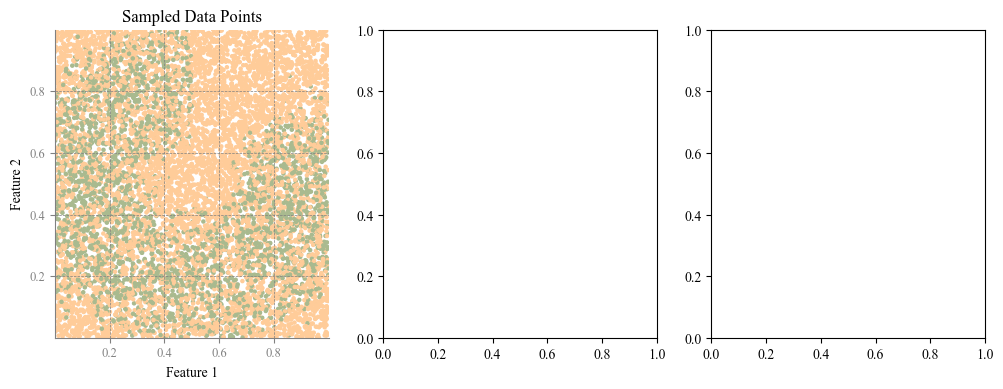

In [11]:
plot_decision_regions_from_dict(X, y, dict_no_noise, max_depth=max_depth, save_name=f"decision_region_{algorithm}_{dataset}.pdf")

Figure saved: C:\Users\jaspe\OneDrive\Desktop\Oblique-Decision-Tree-Algorithms-for-Scenario-Discovery\_data\depth_sweep_single_run_results\coverage_vs_density_oc1_rectangle_2d_fuzziness_005.pdf


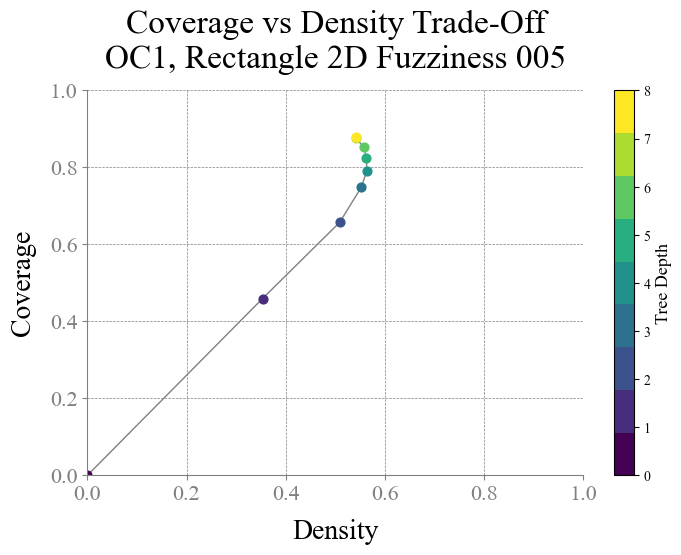

In [22]:
plot_coverage_density_for_shape(dataframe_no_noise, save_name=f"coverage_vs_density_{algorithm}_{dataset}.pdf")